I am using this dataset to find the best streaming service but as a beginner, you can also use this dataset for the tasks such as:

Analyzing the streaming platforms
Analyzing the IMBD and Rotten Tomatoes ratings of all the shows
Analyzing the target age group of most of the TV shows.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


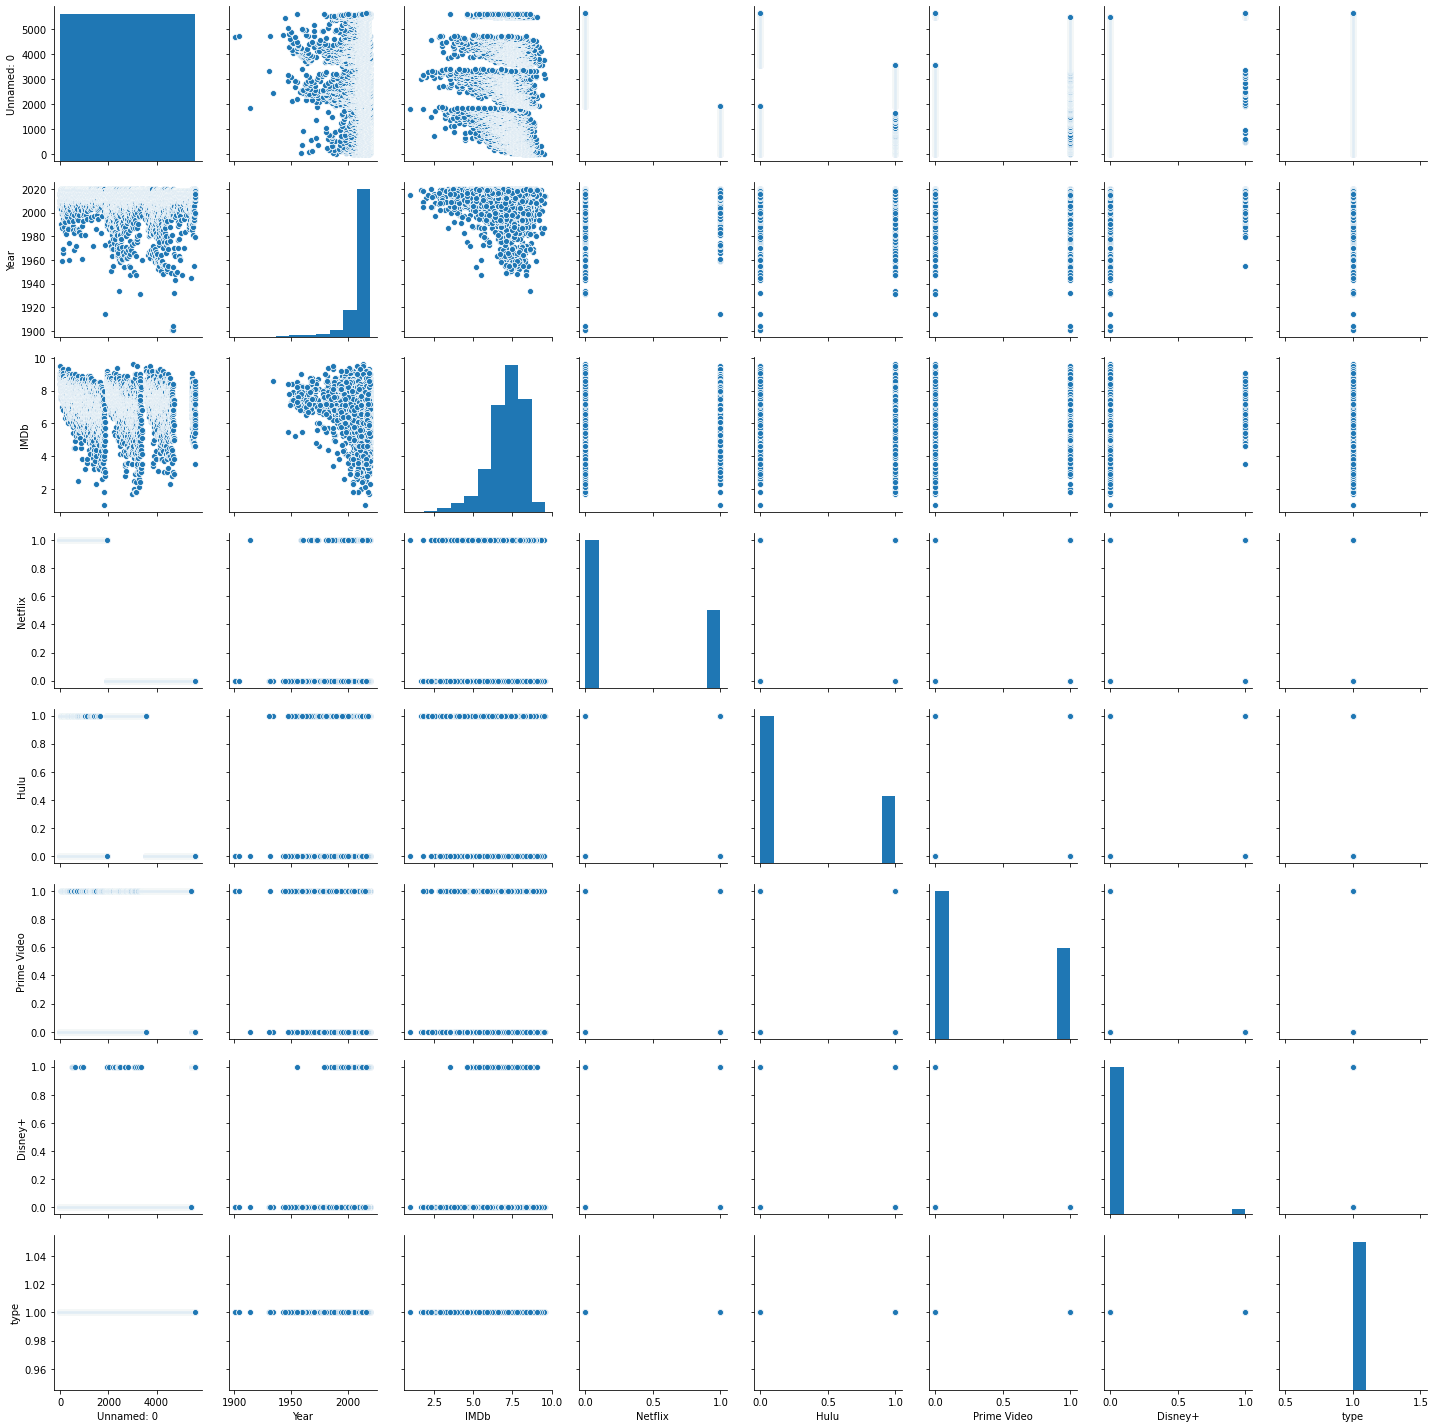

In [4]:
sns.pairplot(tv_shows)
plt.show()

In [5]:
tv_shows.drop_duplicates(subset='Title',
                         keep='first',inplace=True)
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5564 entries, 0 to 5610
Data columns (total 11 columns):
Unnamed: 0         5564 non-null int64
Title              5564 non-null object
Year               5564 non-null int64
Age                3137 non-null object
IMDb               4408 non-null float64
Rotten Tomatoes    1004 non-null object
Netflix            5564 non-null int64
Hulu               5564 non-null int64
Prime Video        5564 non-null int64
Disney+            5564 non-null int64
type               5564 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 521.6+ KB


In [16]:
tv_shows.describe()

,Unnamed: 0,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
count,5564.000000,5564.000000,5564.000000,5564.000000,5564.000000,5564.000000,5564.000000,5564.000000,5564.0
mean,2802.503055,2011.050503,56.367362,14.009705,0.345974,0.310748,0.382099,0.031991,1.0
std,1622.934838,10.995978,30.575659,31.103977,0.475728,0.462841,0.485944,0.175993,0.0
min,0.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1395.750000,2010.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2800.500000,2015.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4211.250000,2017.000000,77.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,5610.000000,2020.000000,96.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [2]:

tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0%')
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].apply(lambda x : x.rstrip('%'))
tv_shows['Rotten Tomatoes'] = pd.to_numeric(tv_shows['Rotten Tomatoes'])

tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)
tv_shows['IMDb'] = tv_shows['IMDb']*10
tv_shows['IMDb'] = tv_shows['IMDb'].astype('int')

In [17]:
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,95,96,1,0,0,0,1
1,1,Stranger Things,2016,16+,88,93,1,0,0,0,1
2,2,Money Heist,2017,18+,84,91,1,0,0,0,1
3,3,Sherlock,2010,16+,91,78,1,0,0,0,1
4,4,Better Call Saul,2015,18+,87,97,1,0,0,0,1


In [23]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)
tv_shows_long

,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Money Heist,Netflix
3,Sherlock,Netflix
4,Better Call Saul,Netflix
...,...,...
22097,Sawyer Sessions,Prime Video
22098,Pinkfong! Dinosaur Songs,Prime Video
22099,How To Self-Publish,Prime Video
22100,BigDo2 - Random Hair,Prime Video


In [25]:
tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')
tv_shows_combined.drop(columns = ['Unnamed: 0','Netflix',
                                  'Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True)
tv_shows_combined.head()

,Title,StreamingOn,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,2008,18+,95,96
1,Stranger Things,Netflix,2016,16+,88,93
2,Money Heist,Netflix,2017,18+,84,91
3,Sherlock,Netflix,2010,16+,91,78
4,Better Call Saul,Netflix,2015,18+,87,97


<AxesSubplot:xlabel='StreamingOn'>

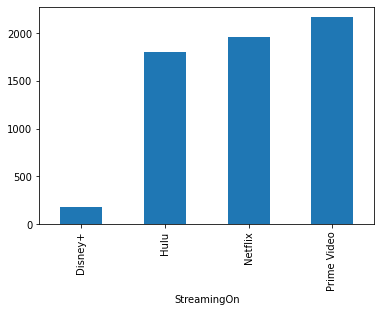

In [5]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [26]:
figure = []
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)        
fig.show()

In [7]:
px.scatter(tv_shows_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')

# Conclusion: